Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Exploratory Analysis

Read the CSV and Perform Basic Data Cleaning

In [2]:
data = pd.read_csv(r"C:\Users\Dell\OneDrive - Hanoi University of Science and Technology\Desktop\Customer-Churn-Records.csv")
print(f"Dataframe dimensions: {data.shape}")
data.head()

Dataframe dimensions: (10000, 18)


RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0        101348.88       1         1                   2   DIAMOND   
1        112542.58       0         1                   3   DIAMOND   
2        113931.57       1         1                   3   DIAMOND   
3         93826.63       0         0                   5      GOLD   
4         79084.10       0         0                   5      GOLD   

   Point Earned  
0           464  
1           456  
2           377  
3           350  
4           425

In [3]:
columns = data.columns.tolist()
columns.remove("Exited")
columns.append("Exited")
data = data[columns]
data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Complain  Satisfaction Score Card Type  Point Earned  \
0        101348.88         1                   2   DIAMOND           464   
1        112542.58         1                   3   DIAMOND           456   
2        113931.57         1                   3   DIAMOND           377   
3         93826.63         0                   5      GOLD           350   
4         79084.10         0                   5      GOLD           425   

   Exited  
0       1  
1       0  
2       1  
3       0  
4       0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point

Unused features

To make data frame easily readable we will drop features not needed for machine learning:
- RowNumber
- CustomerId
- Surname

In [5]:
# Drop unused features
data = data.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])
print(f"Dataframe dimensions: {data.shape}")
data.head()

Dataframe dimensions: (10000, 15)


CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Complain  Satisfaction Score  \
0          1               1        101348.88         1                   2   
1          0               1        112542.58         1                   3   
2          1               0        113931.57         1                   3   
3          0               0         93826.63         0                   5   
4          1               1         79084.10         0                   5   

  Card Type  Point Earned  Exited  
0   DIAMOND           464       1  
1   DIAMOND           456       0  
2   DIAMOND           377       1  
3      GOLD           350       0  
4      GOLD           425       0

In [6]:
data.isnull().values.any()

False

In [7]:
data.isna().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64

In [8]:
correlations = data.corr()
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols, sort_corr_cols]

<function matplotlib.pyplot.show(close=None, block=None)>

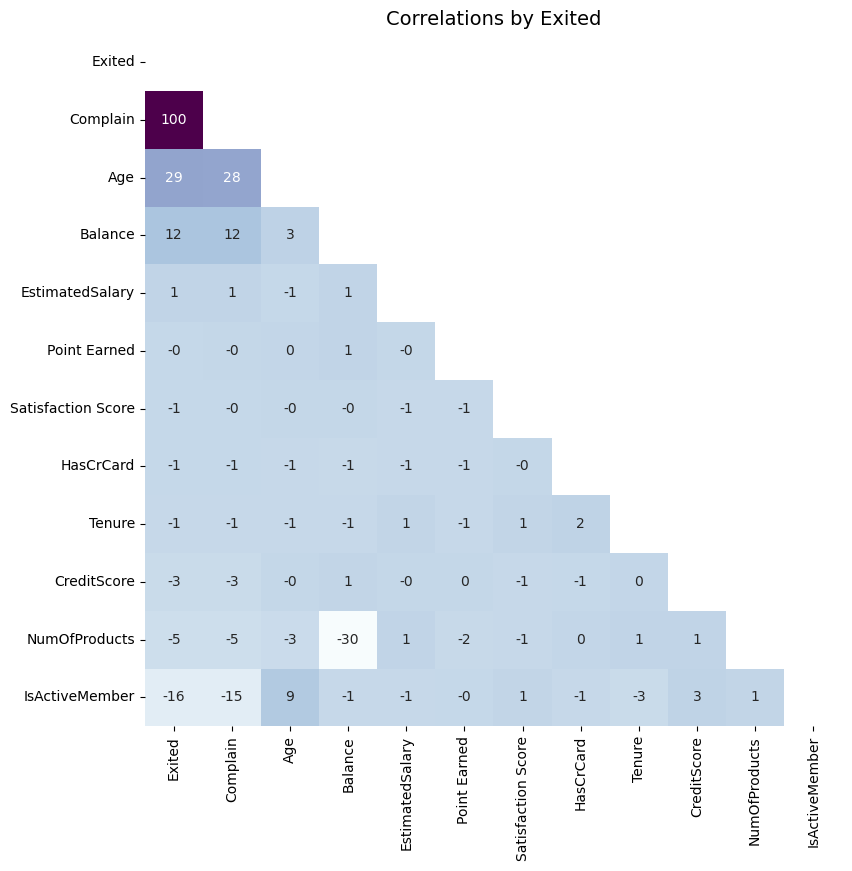

In [9]:
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1
plt.figure(figsize = (9, 9))
sns.heatmap(sort_corr*100,
           cmap = "BuPu",
           annot = True,
           fmt = ".0f",
           mask = corr_mask,
           cbar = False)
plt.title("Correlations by Exited", fontsize = 14)
plt.yticks(rotation = 0)
plt.show

Due to the high correlation between the "Complain" variable and the "Exited" variable, we have decided to drop the "Complain" variable in order to avoid potential issues of multicollinearity and enhance the model's performance in predicting customer churn.

In [10]:
# Drop unused features
data = data.drop(columns = ['Complain'])
print(f"Dataframe dimensions: {data.shape}")
data.head()

Dataframe dimensions: (10000, 14)


CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score Card Type  \
0          1               1        101348.88                   2   DIAMOND   
1          0               1        112542.58                   3   DIAMOND   
2          1               0        113931.57                   3   DIAMOND   
3          0               0         93826.63                   5      GOLD   
4          1               1         79084.10                   5      GOLD   

   Point Earned  Exited  
0           464       1  
1           456       0  
2           377       1  
3           350       0  
4           425       0

Correlation

In [11]:
correlations = data.corr()
sort_corr_cols = correlations.Exited.sort_values(ascending=False).keys()
sort_corr = correlations.loc[sort_corr_cols, sort_corr_cols]

<function matplotlib.pyplot.show(close=None, block=None)>

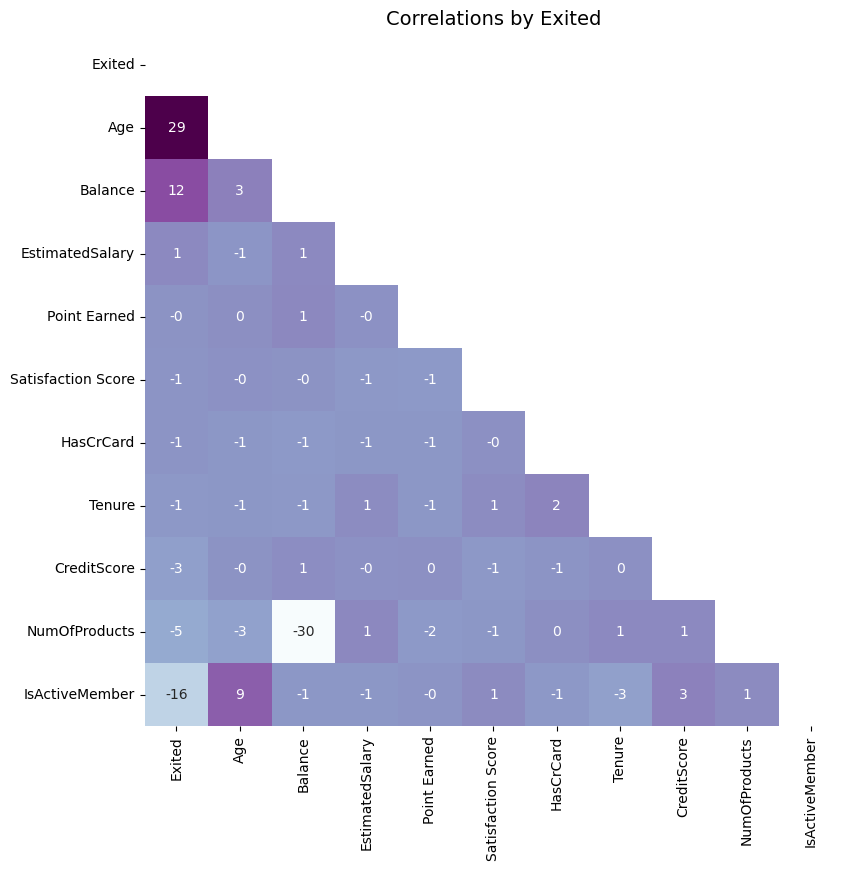

In [12]:
corr_mask = np.zeros_like(correlations)
corr_mask[np.triu_indices_from(corr_mask)] = 1
plt.figure(figsize = (9, 9))
sns.heatmap(sort_corr*100,
           cmap = "BuPu",
           annot = True,
           fmt = ".0f",
           mask = corr_mask,
           cbar = False)
plt.title("Correlations by Exited", fontsize = 14)
plt.yticks(rotation = 0)
plt.show

Very weak correlations in general. Only weak positive correlation with age, very weak positive correlation with balance, and very weak negative correlations with number of products and membership.

In [13]:
data.dtypes

CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
Exited                  int64
dtype: object

In [14]:
(data.isnull().sum()/len(data))

CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned          0.0
Exited                0.0
dtype: float64

Distributions of Numeric Features

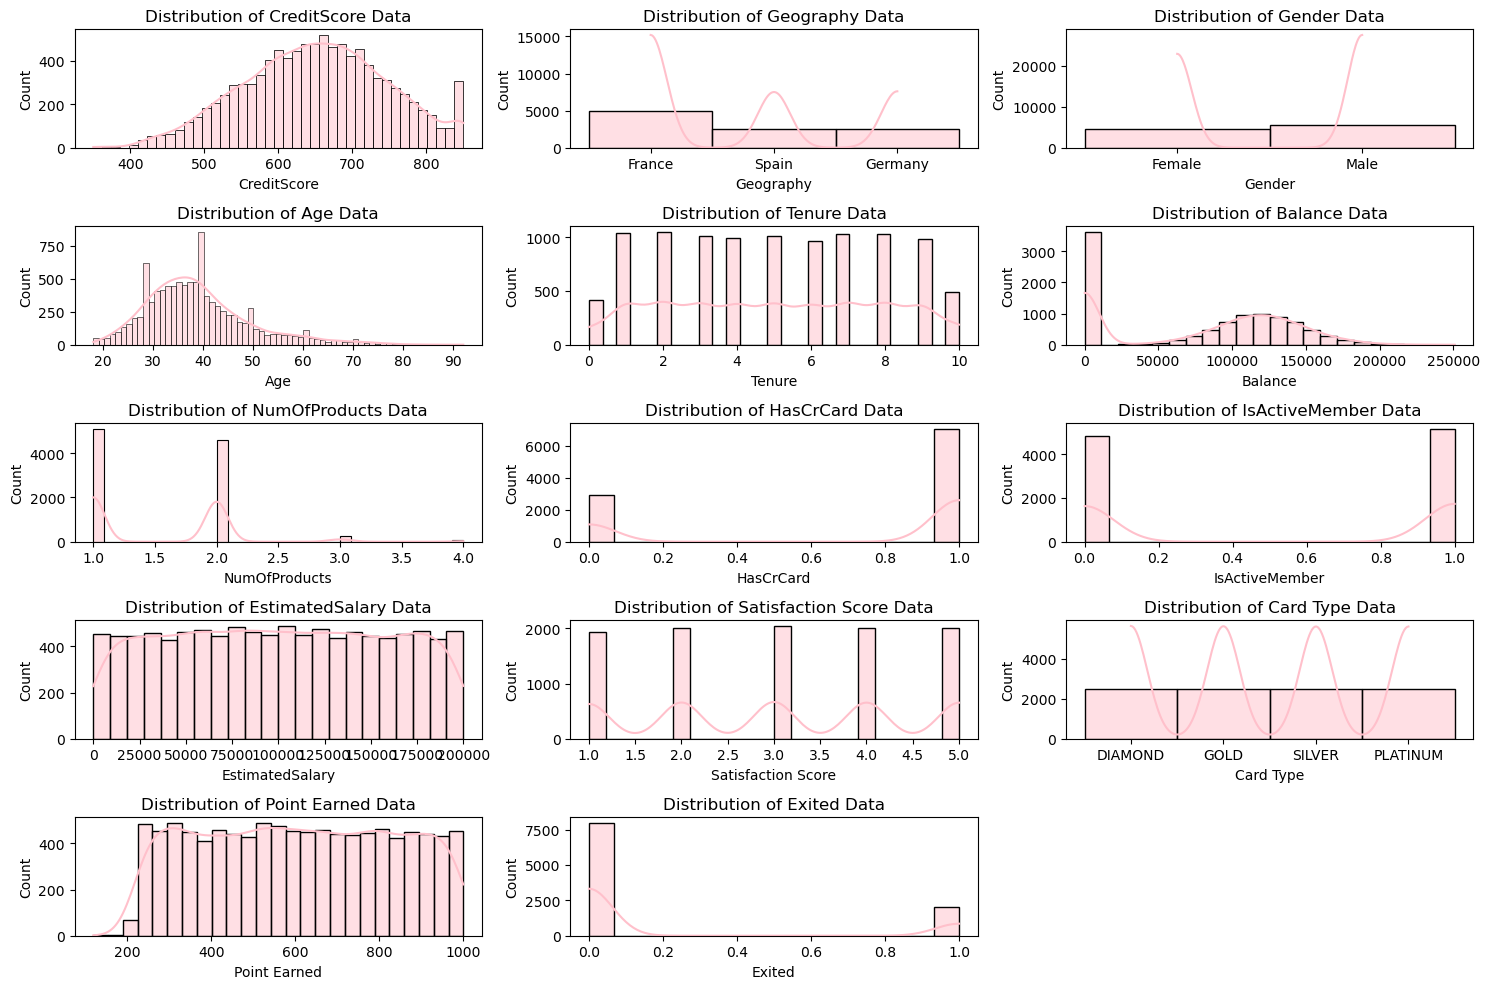

In [15]:
plt.figure(figsize = (15, 10))
for i, col in enumerate(data.columns, 1):
    plt.subplot(5, 3, i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(data[col], kde = True, color = "pink")
    plt.tight_layout()
    plt.plot()

Summary statistics for the numeric features

In [16]:
data.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  \
count  10000.00000    10000.000000     10000.000000        10000.000000   
mean       0.70550        0.515100    100090.239881            3.013800   
std        0.45584        0.499797     57510.492818            1.405919   
min        0.00000        0.000000        11.580000            1.000000   
25%        0.00000        0.000000     51002.110000            2.000000   
50%        1.00000        1.000000    100193.915000            3.000000   
75%        1.00000        1.000000    149388.247500            4.000000   
max        1.00000        1.000000    199992.480000            5.000000   

       Point Earned        Exited  
count  10000.000000  10000.000000  
mean     606.515100      0.203800  
std      225.924839      0.402842  
min      119.000000      0.000000  
25%      410.000000      0.000000  
50%      605.000000      0.000000  
75%      801.000000      0.000000  
max     1000.000000      1.000000

Distributions of Categorical Features

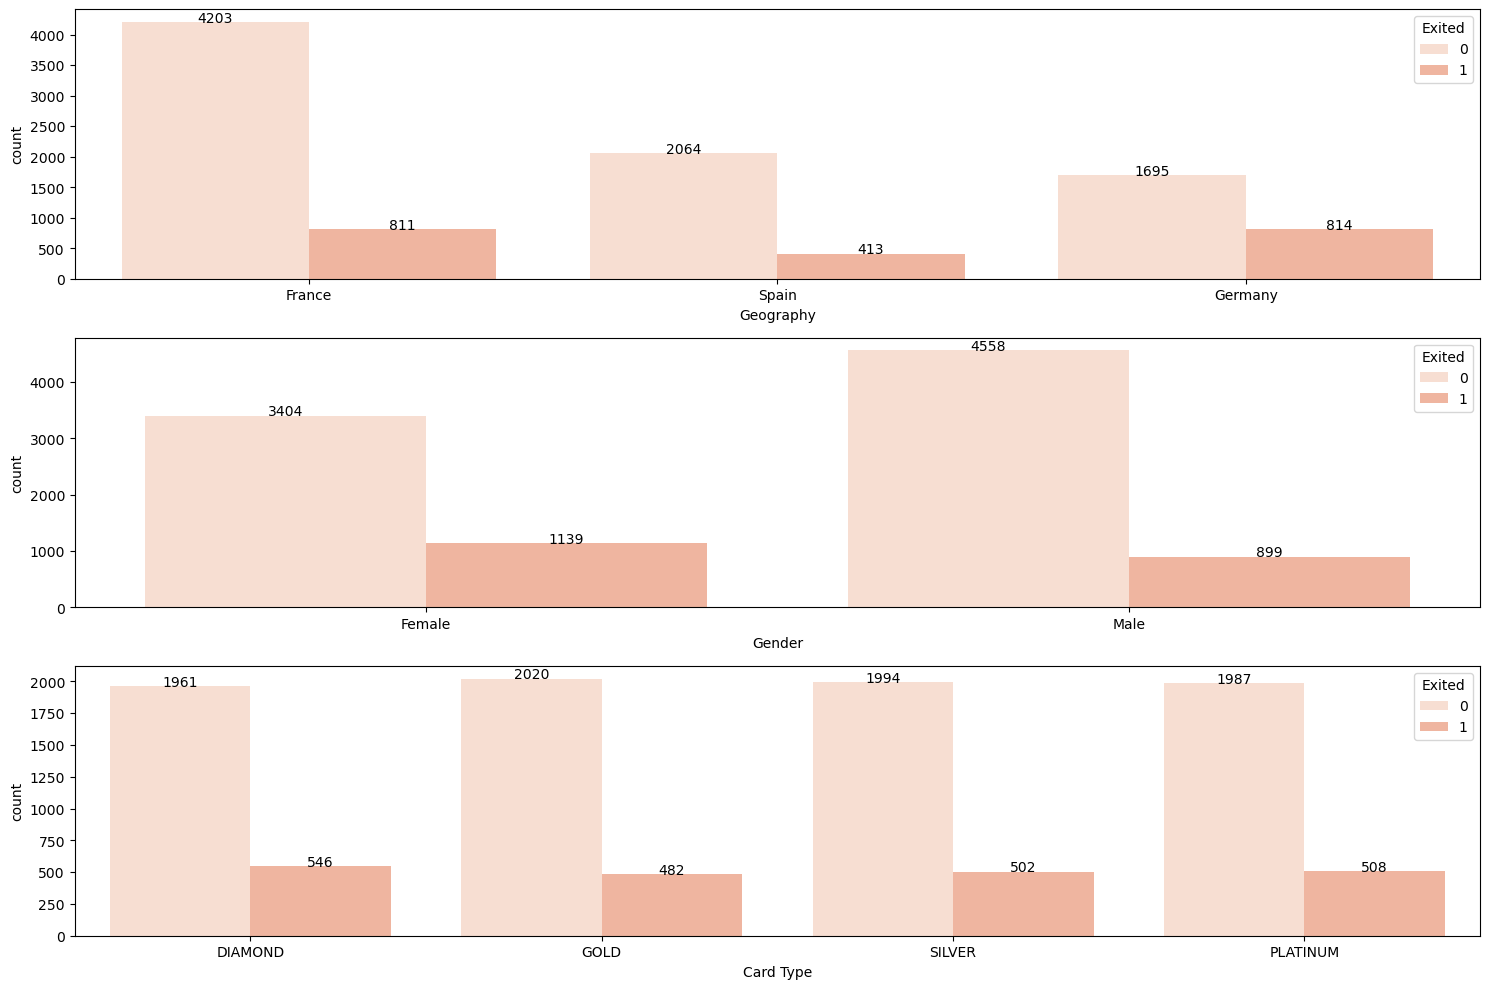

In [21]:
categorical_features = ['Geography', "Gender", "Card Type"]
fig, axs = plt.subplots(len(categorical_features), figsize = (15, 10))
colors = sns.color_palette("Reds")

#Iterate over categorical columns and plot bar charts
for i, col in enumerate(categorical_features):
  sns.countplot(x = col, hue = 'Exited', data = data, ax = axs[i], palette = colors)
  for p in axs[i].patches:
    axs[i].annotate(format(p.get_height(),'.0f'),(p.get_x() + 0.2, p.get_height() + 1), ha = 'center')

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()

Pairplot

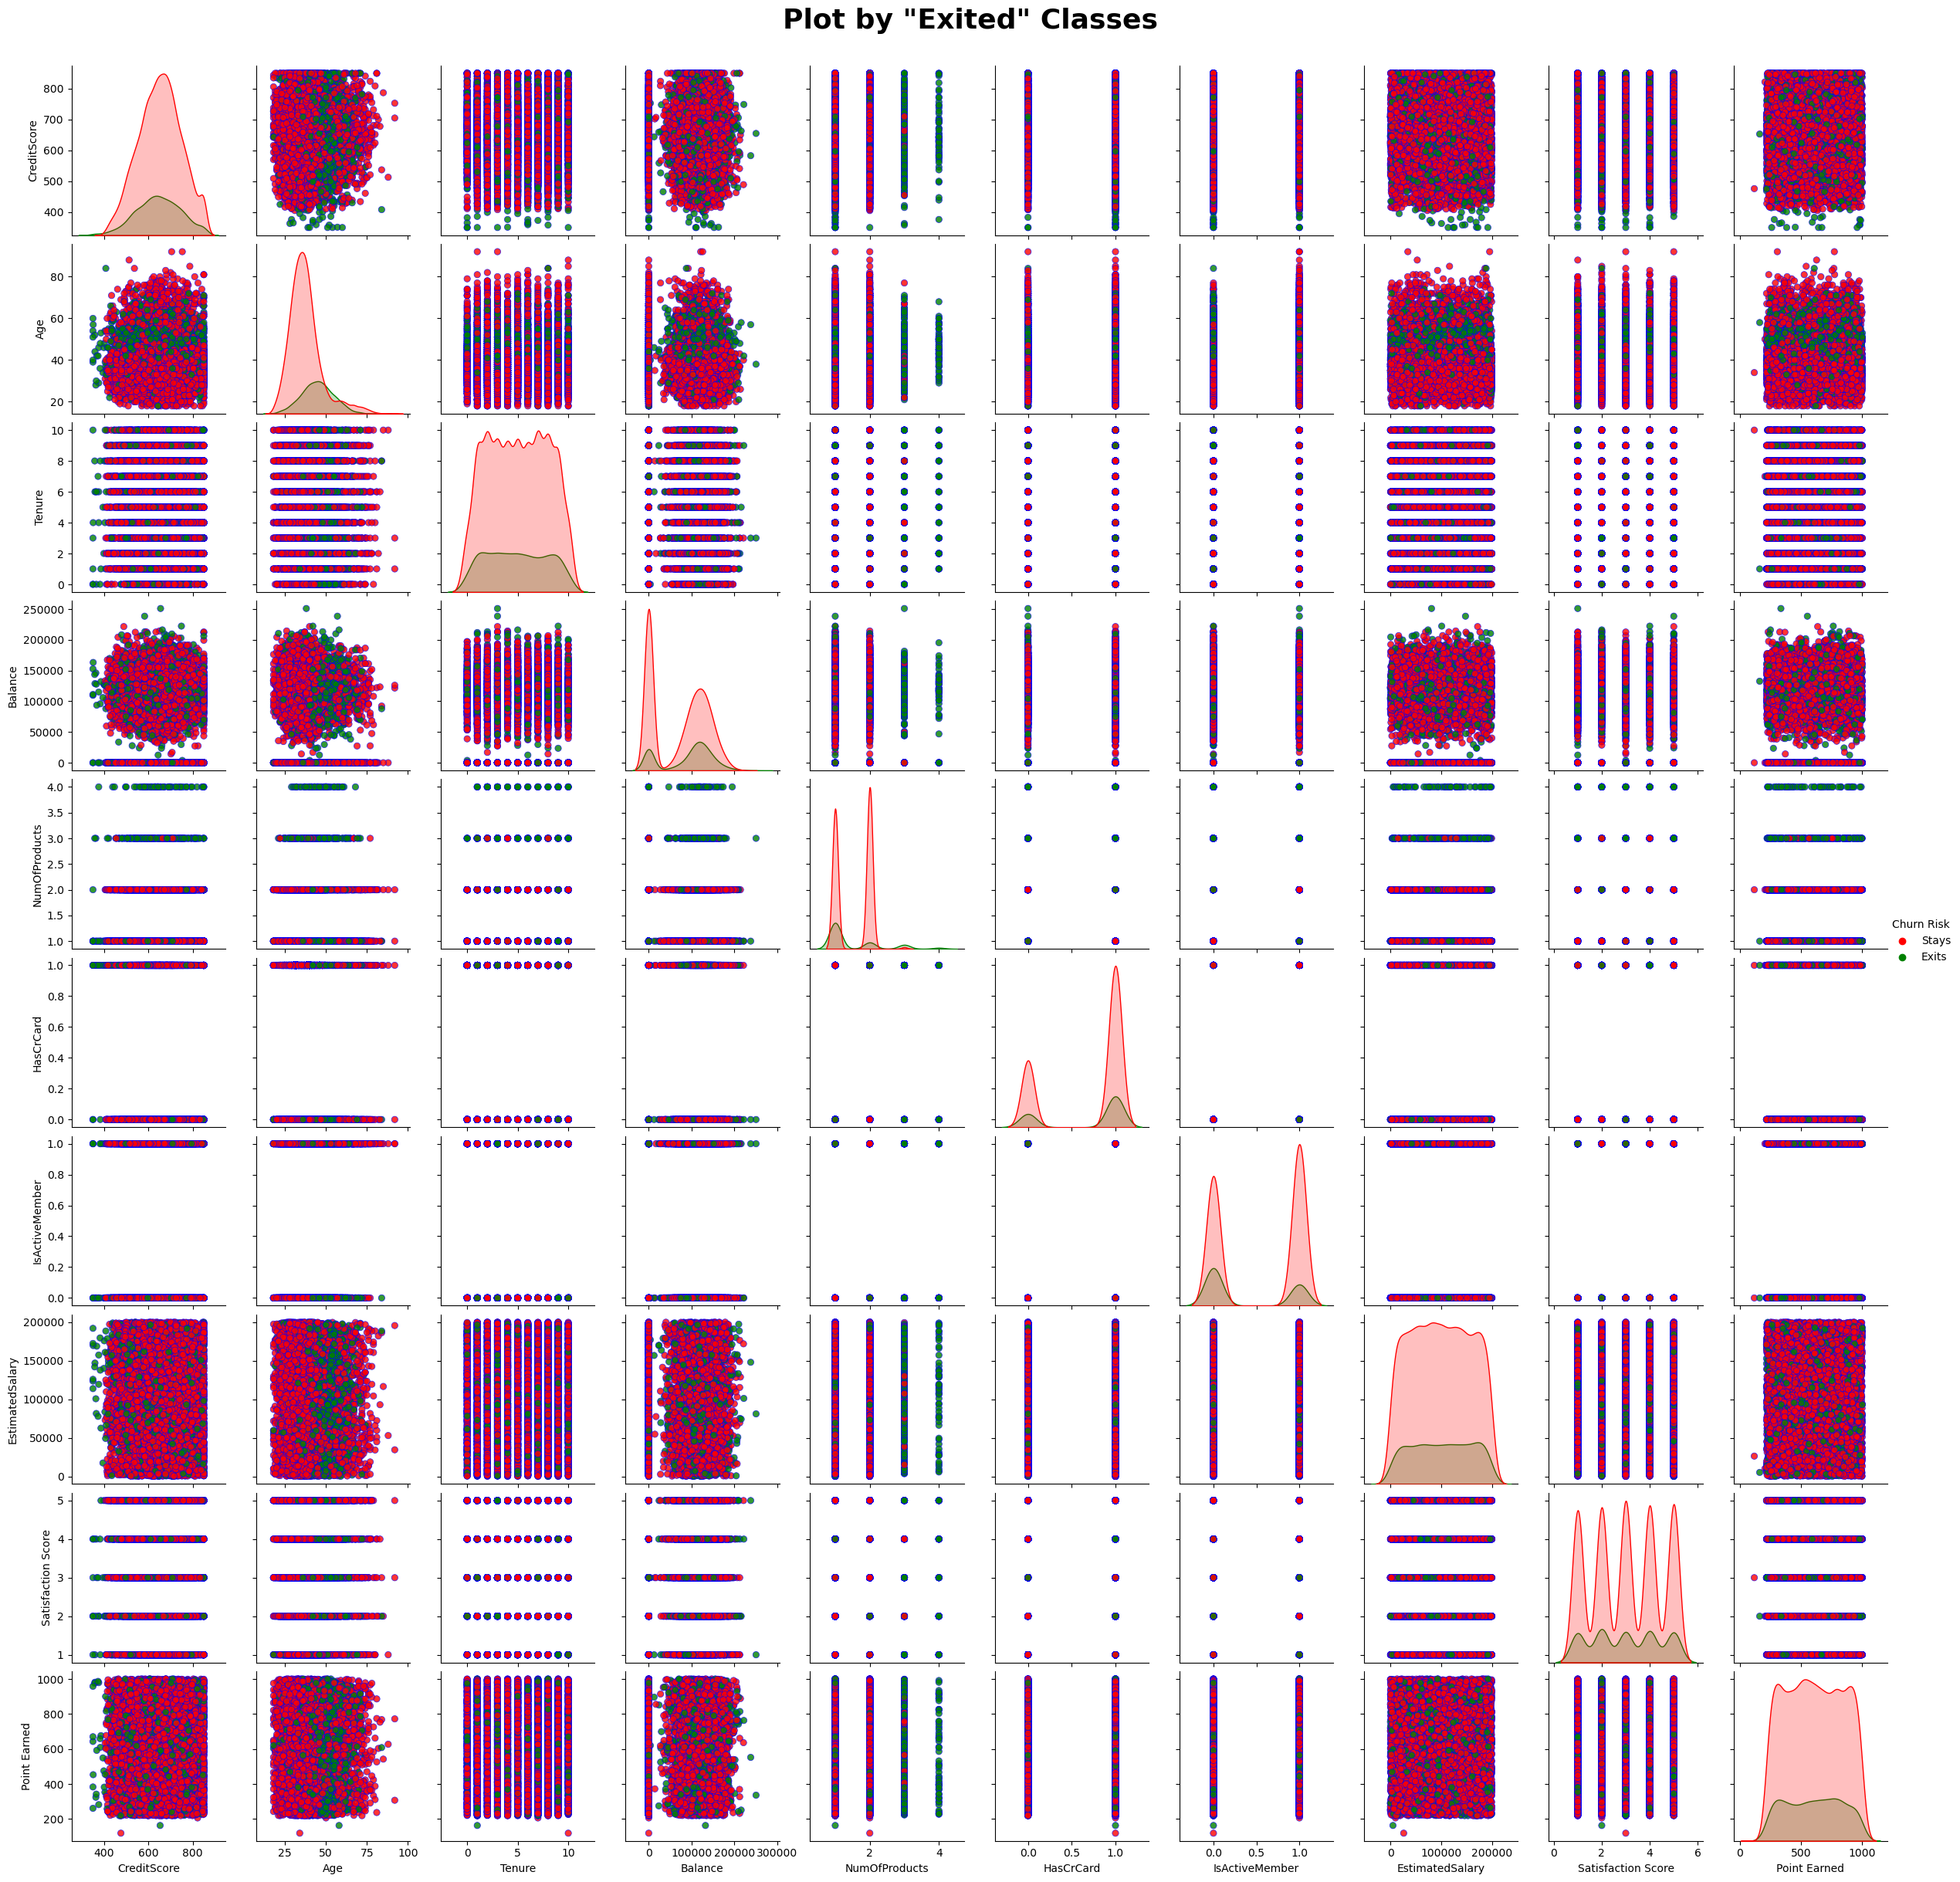

In [23]:
# Plot Seaborn's pairplot
g = sns.pairplot(data, hue='Exited',
                 palette={1 : 'green',
                          0 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Plot by "Exited" Classes',
             fontsize=26,
             fontweight='bold')


# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

The density plots on the diagonal make it easier to compare these distributions. We can notice that only few features have slightly different distributions. For example, from the density plot for Age, it could be seen that older people have slightly higher tendecy to leave the bank.

Let’s reduce the clutter by plotting only four features: Age, IsActiveMember, NumOfProducts and Balance.

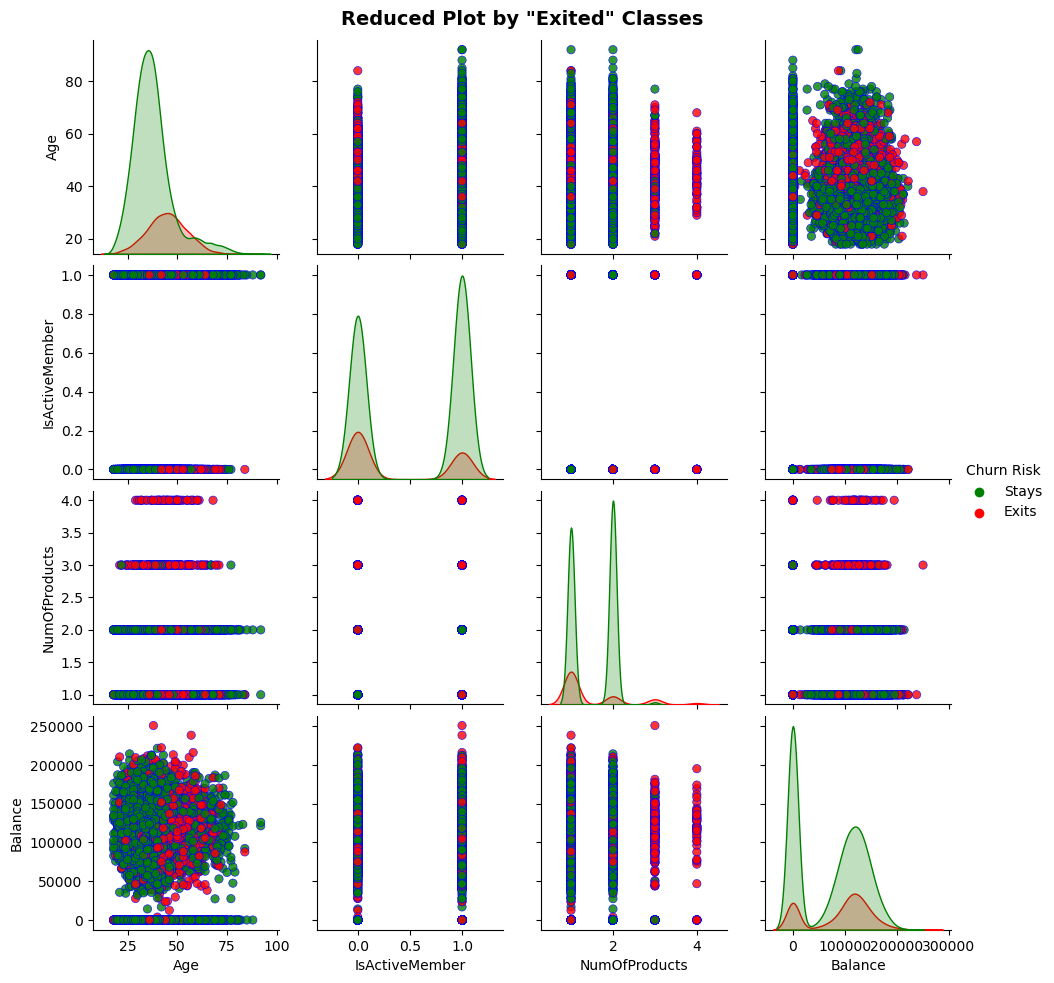

In [25]:
# Plot Seaborn's pairplot
g = sns.pairplot(data, hue='Exited',
                 vars=['Age', 'IsActiveMember', 'NumOfProducts', 'Balance'], # reduce to less features
                 palette={0 : 'green',
                          1 : 'red'},
                 plot_kws={'alpha' : 0.8, 'edgecolor' : 'b', 'linewidth' : 0.5})

fig = g.fig
fig.subplots_adjust(top=0.95, wspace=0.2)
fig.suptitle('Reduced Plot by "Exited" Classes',
             fontsize=14,
             fontweight='bold')

# Update the legend
new_title = 'Churn Risk'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Stays', 'Exits']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.show()

From density plots we can see that older customers and customer with more products more often leaving the bank.

Violin Plots

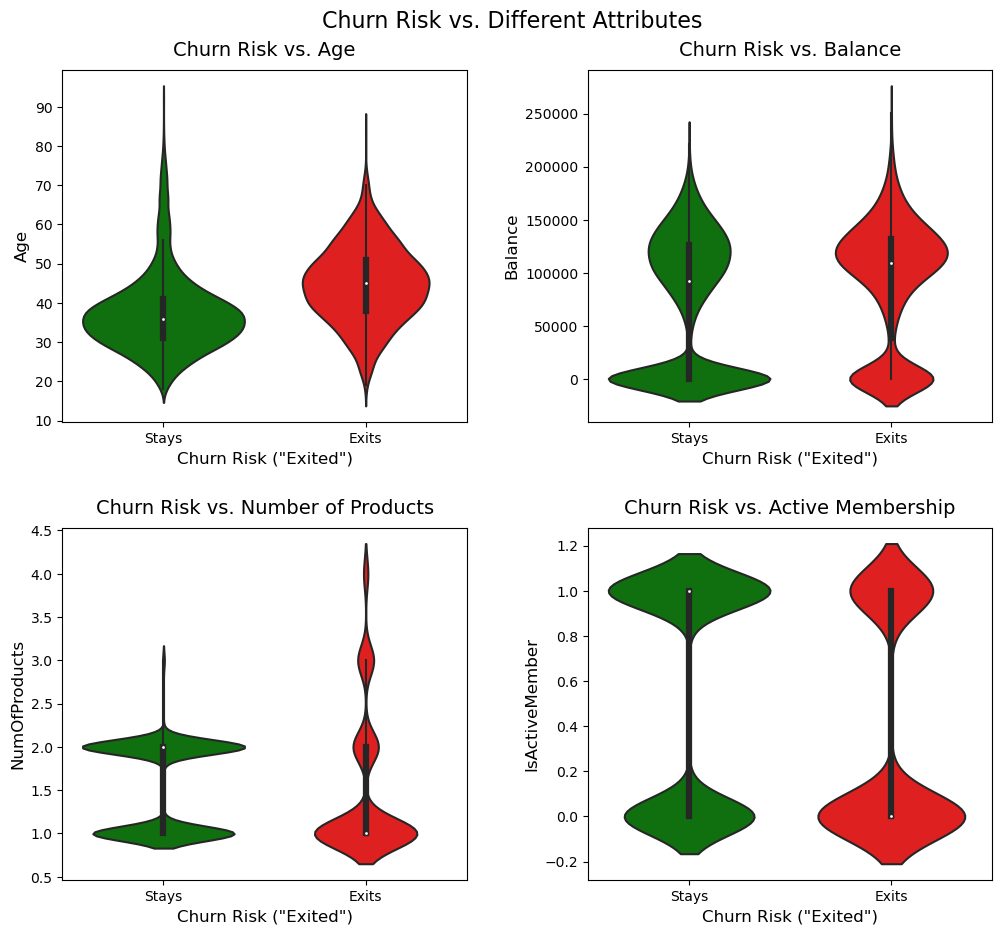

In [28]:
# Segment age by Exited and plot distributions
#  “categorical” variable Exited is a numeric
#  for plotting purposes only we will change it to real categorical variable

# Define palette
my_pal = {'Stays': 'green', 'Exits': 'red'}
# Convert to categorical
hr = {0: 'Stays', 1: 'Exits'}
churn = data['Exited'].map(hr)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Churn Risk vs. Different Attributes', fontsize=16)
fig.subplots_adjust(top=0.92, wspace=0.3, hspace=0.3)

sns.violinplot(x=churn,
               y=data['Age'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax1)

ax1.set_title('Churn Risk vs. Age', fontsize=14, pad=10)
ax1.set_ylabel('Age',size=12)
ax1.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=data['Balance'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax2)

ax2.set_title('Churn Risk vs. Balance', fontsize=14, pad=10)
ax2.set_ylabel('Balance',size=12)
ax2.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=data['NumOfProducts'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax3)

ax3.set_title('Churn Risk vs. Number of Products', fontsize=14, pad=10)
ax3.set_ylabel('NumOfProducts',size=12)
ax3.set_xlabel('Churn Risk ("Exited")', size=12)

sns.violinplot(x=churn,
               y=data['IsActiveMember'],
               order=['Stays', 'Exits'], 
               palette=my_pal,
               ax=ax4)

ax4.set_title('Churn Risk vs. Active Membership', fontsize=14, pad=10)
ax4.set_ylabel('IsActiveMember',size=12)
ax4.set_xlabel('Churn Risk ("Exited")', size=12)
plt.show()

Violin plots are confirming the earlier statement that older customers and customer with more products are more likely to leave the bank.

Distributions of the Target Feature

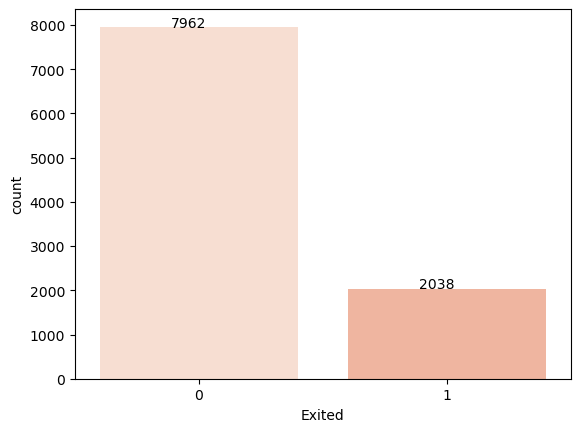

In [26]:
fig, axs = plt.subplots()
colors = sns.color_palette("Reds")
sns.countplot(x = 'Exited', data = data, palette = colors, ax = axs)
for p in axs.patches:
  axs.annotate(format(p.get_height(),'.0f'), (p.get_x() + 0.36, p.get_height() + 1), ha = 'center')

We can see that our dataset is imbalanced. The majority class, "Stays" (0), has around 80% data points and the minority class, "Exits" (1), has around 20% datapoints.

To address this, in our machine learning algorithms we will use SMOTE (Synthetic Minority Over-sampling Technique).

Finalizing the Dataframe 

In [29]:
data.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score Card Type  \
0          1               1        101348.88                   2   DIAMOND   
1          0               1        112542.58                   3   DIAMOND   
2          1               0        113931.57                   3   DIAMOND   
3          0               0         93826.63                   5      GOLD   
4          1               1         79084.10                   5      GOLD   

   Point Earned  Exited  
0           464       1  
1           456       0  
2           377       1  
3           350       0  
4           425       0

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Satisfaction Score  10000 non-null  int64  
 11  Card Type           10000 non-null  object 
 12  Point Earned        10000 non-null  int64  
 13  Exited              10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Save the dataframe as the analytical base table

In [32]:
# # Save analytical base table
# data.to_csv('C:/Users/Dell/OneDrive - Hanoi University of Science and Technology/Desktop/analytical_base_table.csv', index=None)